In [6]:
import random
import matplotlib.pyplot as plt
from time import gmtime, strftime
import math
###Input parameters##
size=100
r=0.8
precise=100000

xdiv=10
ydiv=10

def check(xy,p,a,b):
    for i in range(len(xy[a][b])):
        ds=(xy[a][b][i][0]-p[0])**2+(xy[a][b][i][1]-p[1])**2
        if ds<(2*r)**2:
            return xy,False
        else:
            if(i==(len(xy[a][b])-1)):
                return xy,True

def checkfinal(final,p):
    k=0
    for j in range(len(final)):
        ds = (final[j][0] - p[0]) ** 2 + (final[j][1] - p[1]) ** 2
        if (ds < (2 * r) ** 2):
            k=k+1
    return k

def plot(xy):
    fig1 = plt.figure()
    for i in range(len(xy[0])):
        for j in range(len(xy)):
            for z in range(len(xy[i][j])):
                circle1 = plt.Circle((xy[i][j][z][0], xy[i][j][z][1]), r, color='r')
                plt.gcf().gca().add_artist(circle1)
    plt.xlim(0, size)
    plt.ylim(0, size)
    plt.show()

def checkx(p):
    sqx=int(math.floor(p[0]/10))
    disx=p[0]-sqx*10
    if(disx>=(10-r)):
        if(sqx==9):
            checksqx=[sqx]
        else:
            checksqx = [sqx, sqx + 1]
    elif(disx<r):
        if (sqx == 0):
            checksqx = [sqx]
        else:
            checksqx = [sqx, sqx - 1]
    else:
        checksqx=[sqx]
    return checksqx

def point(xy,final):
    for j in range(precise):
        p=[random.uniform(0,size),random.uniform(0,size)]
        xch=checkx(p)
        ych=checkx(p)
        l=0
        t = []
        for a in xch:
            for b in ych:
                l=l+1
                rt=False
                xy,rt=check(xy,p,a,b)
                if rt:
                    t.append(rt)
                if (t.count(True)==len(xch)*len(ych)) and (l==len(xch)*len(ych)) and (xy[xch[0]][ych[0]][0] != p):
                    k=checkfinal(final,p)
                    if k==0:
                        final.append(p)
                        #print p,len(final)
                        xy[xch[0]][ych[0]].append(p)
                        return xy,True
                    else:
                        break
                if j==precise-1:
                    return xy,False
    return xy,False


with open ("Num.txt", 'a+') as FileHandle1:
    with open ("Points.txt", 'a+') as FileHandle:
        for i in range(100):
            print("Simulation no: " + str(i+1) + "\n")
            print("Time of Siml: " + strftime("%Y-%m-%d %H:%M:%S", gmtime()) + "\n")
            FileHandle.writelines("----------------------------------------" + "\n")
            FileHandle.writelines("Simulation no: " + str(i+1) + "\n")
            FileHandle.writelines("Time of Siml: " + strftime("%Y-%m-%d %H:%M:%S", gmtime()) + "\n")
            FileHandle.writelines("----------------------------------------" + "\n")
            xy=[[[[random.uniform(jt*10+r,(jt+1)*10-r),random.uniform(kt*10+r,(kt+1)*10-r)]] for jt in range(10)] for kt in range(10)]
            end = True
            final = []
            for ab in range(10):
                for abc in range(10):
                    for t in range(len(xy[ab][abc])):
                        final.append(xy[ab][abc][t])
            while end:
                xy,end=point(xy,final)
            tot=0
            for ab in range(10):
                for abc in range(10):
                    tot = tot + len(xy[ab][abc])
                    for t in range(len(xy[ab][abc])):
                        FileHandle.writelines(str(xy[ab][abc][t][0]) + " " + str(xy[ab][abc][t][1]) + "\n")
            print ("Time of Siml: " + strftime("%Y-%m-%d %H:%M:%S", gmtime()) + "\n")
            FileHandle.writelines("End Time of Siml: " + strftime("%Y-%m-%d %H:%M:%S", gmtime()) + "\n")
            FileHandle.writelines("----------------------------------------" + "\n") # 40 of -
            FileHandle.writelines("LEN XY: " + str(tot) + "\n")
            FileHandle1.writelines("LEN XY: " + str(tot) + "\n")


Simulation no: 1

Time of Siml: 2022-10-04 13:18:21

Time of Siml: 2022-10-04 13:21:08
)
Simulation no: 2

Time of Siml: 2022-10-04 13:21:08

Time of Siml: 2022-10-04 13:23:35
)
Simulation no: 3

Time of Siml: 2022-10-04 13:23:35



KeyboardInterrupt: 

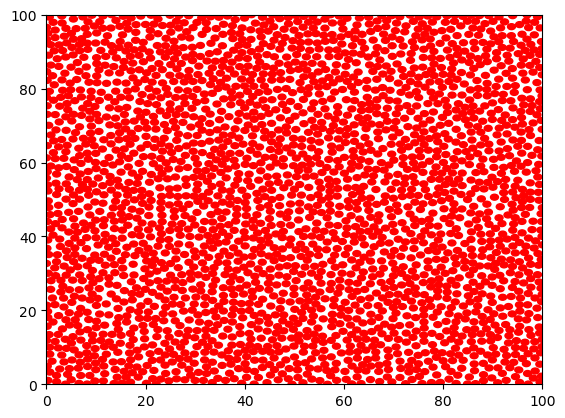

In [7]:
plot(xy)